<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">



# Turma #867 - Projeto Machine Learning I - Equipe 03
---


## Modelo KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics

np.random.seed(4)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def reading_dataframe(path, sep=None):

  """ Leitura de um arquivo csv"""

    dataframe = pd.read_csv(path, sep=sep)
    return dataframe

In [4]:
df_credit_train= reading_dataframe("application_train.csv")

In [5]:
df_credit_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


**Critério de seleção de variáveis**

 -  5 Maiores correlações positivas
 -  5 Menores correlações negativas

In [6]:
corr_sorting = df_credit_train.corr()['TARGET'].sort_values()

In [7]:
corr_sorting.head(n=5)

EXT_SOURCE_3    -0.179246
EXT_SOURCE_2    -0.160978
EXT_SOURCE_1    -0.158619
DAYS_EMPLOYED   -0.044862
FLOORSMAX_AVG   -0.043720
Name: TARGET, dtype: float64

In [8]:
corr_sorting.tail(n=5)

DAYS_LAST_PHONE_CHANGE         0.054471
REGION_RATING_CLIENT           0.059170
REGION_RATING_CLIENT_W_CITY    0.061518
DAYS_BIRTH                     0.079414
TARGET                         1.000000
Name: TARGET, dtype: float64

In [9]:
credit_train_5 = df_credit_train[['EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1',
                                  'DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','TARGET']]

In [10]:
credit_train_5.shape

(246008, 6)

In [11]:
credit_train_5.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,TARGET
0,0.171468,0.699373,NaN,-589.0,2,0
1,0.768808,0.199651,0.541385,-1409.0,2,0
2,0.626304,0.704880,NaN,-675.0,2,0
3,0.810618,0.724576,NaN,-1588.0,1,0
4,0.331251,0.706310,0.592466,0.0,2,0


**Visualização dos resultados Nulos**

In [12]:
def column_empty(dataframe):

  """ Verifica as colunas que possuem dados vazios"""

  for col in (dataframe):
    if(dataframe[col].isnull().any()):
        print(col)

def values_estimate():
  return IterativeImputer()

In [13]:
column_empty(credit_train_5)

EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_LAST_PHONE_CHANGE


In [14]:
credit_train_5.isnull().mean().round(4)*100

EXT_SOURCE_3              19.81
EXT_SOURCE_2               0.22
EXT_SOURCE_1              56.42
DAYS_LAST_PHONE_CHANGE     0.00
REGION_RATING_CLIENT       0.00
TARGET                     0.00
dtype: float64

**Transformações nos Dados**

- Os dados possuem muitos valores nulos, portanto vamos utilizar o imputador multivariado que estima as características das outras variáveis.

In [15]:
df_credit_transf = pd.DataFrame(values_estimate().fit_transform(credit_train_5), columns = credit_train_5.columns)

In [16]:
column_empty(df_credit_transf)

In [17]:
df_credit_transf.tail()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,TARGET
246003,0.689479,0.701172,0.613821,-2791.0,2.0,0.0
246004,0.716570,0.364945,0.507666,-1431.0,3.0,0.0
246005,0.366453,0.285898,0.362307,-1535.0,1.0,1.0
246006,0.813917,0.390046,0.502168,-2612.0,2.0,1.0
246007,0.525091,0.679636,0.528770,-521.0,2.0,0.0


In [18]:
X = df_credit_transf.drop(['TARGET'],axis=1).values

In [19]:
y = df_credit_transf[['TARGET']].values

In [20]:
print(len(X))
print(len(y))

246008
246008


**Ajustes de classes desbalanceadas**
- Aqui é utilizada a classe SMOTE para ajustar o balanceamento dos dados.
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [21]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=4)

In [24]:
print(len(X))       
print(len(X_train)) 
print(len(X_test)) 

246008
361660
90416


In [25]:

def TheBest_K(X_train, y_train, X_test, y_test, n):

    """Função que demonstra o melhor K"""
  

    ert = []
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        mae = mean_absolute_error(y_test, pred_i)
        ert.append(mae)

    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),ert,color='red', linestyle='dashed', 
            marker='o',markerfacecolor='green', markersize=10)
    plt.title('Taxa de Erro vs. Valor de K')
    plt.xlabel('K')
    plt.ylabel('Taxa de Erro')
    print("Erro mínimo:-",min(ert),"em K =",ert.index(min(ert)))

    acc = []
    for i in range(1,n):
        neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),acc,color = 'red',linestyle='dashed', 
            marker='o',markerfacecolor='green', markersize=10)
    plt.title('Acurácia vs. Valor de K')
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    print("Acurácia Máxima:-",max(acc),"em K =",acc.index(max(acc)))


def myKNN(X_exp=None, 
        y_depend=None, 
        k_neighbors=None, 
        seed_=None, 
        percent_test:float=None,
        type_:str=None):
        
    """ Função que implementa o algoritmo KNN"""
  
    X_train, X_test, y_train, y_test = train_test_split(X_exp, y_depend, test_size=percent_test, random_state=seed_)
    
    scaler = StandardScaler()

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    if type_ =='r':

        reg = KNeighborsRegressor(n_neighbors=k_neighbors)
        reg.fit(X_train, y_train)

        reg = KNeighborsRegressor(n_neighbors=k_neighbors)
        reg.fit(X_train, y_train)

        predict_ = reg.predict(X_test)

        mae = mean_absolute_error(y_test, predict_)
        mse = mean_squared_error(y_test, predict_)
        rmse = mean_squared_error(y_test, predict_, squared=False)

        print(f"mae: {mae}")
        print(f"mse: {mse}")
        print(f"rmse: {rmse}")
        print("\n")
        print(f"regressor score :{reg.score(X_test, y_test)}")

        return reg

    if type_ =='c':
        classf = KNeighborsClassifier(n_neighbors=k_neighbors)
        classf.fit(X_train, y_train)
        predict_ = classf.predict(X_test)

        #acc =  classf.score(X_test, y_test)
        #acc = accuracy_score(y_test, predict_)
        roc_auc = roc_auc_score(y_test, predict_)
        #print(f"Medida de acurácia: {acc}")
        print("\n")
        print(f"Métrica ROC: {roc_auc}")
        report = metrics.classification_report(y_test, predict_)
        print(report)

        return classf


Erro mínimo:- 0.07236551052910989 em K = 0
Acurácia Máxima:- 0.9276344894708901 em K = 0


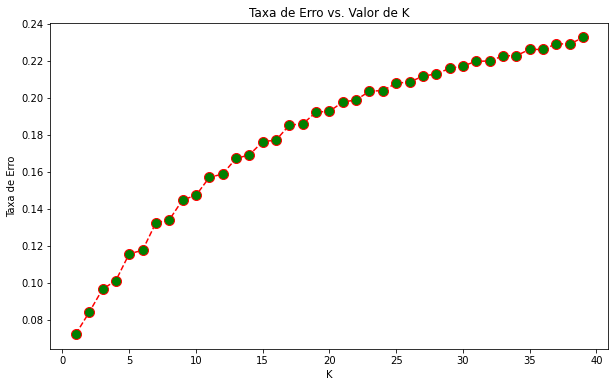

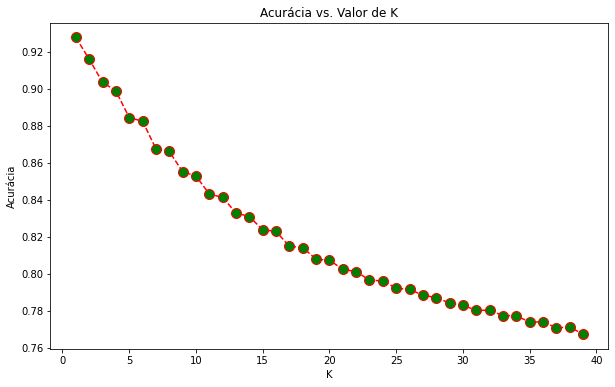

In [26]:
TheBest_K(X_train, y_train, X_test, y_test, 40)

In [27]:
myKNN(X_smote, y_smote, 5, 4, 0.2, 'c')



Métrica ROC: 0.88786007374691
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89     45148
         1.0       0.87      0.91      0.89     45268

    accuracy                           0.89     90416
   macro avg       0.89      0.89      0.89     90416
weighted avg       0.89      0.89      0.89     90416



KNeighborsClassifier()

---